In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv(r"C:\Users\Prasad\Desktop\ml\data_ml\loan_sanction\loan_sanction_train.csv")
df_test = pd.read_csv(r"C:\Users\Prasad\Desktop\ml\data_ml\loan_sanction\loan_sanction_test.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### PREPROCESSING

In [6]:
df_train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [14]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [18]:
df_train[['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']] = df_train[['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']].fillna('Unknown')

In [20]:
df_test[['Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']] = df_test[['Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']].fillna('Unknown')

In [22]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
object?

Init signature: object()
Docstring:     
The base class of the class hierarchy.

When called, it accepts no arguments and returns a new featureless
instance that has no instance attributes and cannot be given any.
Type:           type
Subclasses:     type, async_generator, bytearray_iterator, bytearray, bytes_iterator, bytes, builtin_function_or_method, callable_iterator, PyCapsule, cell, ...

In [26]:
df_train['Gender'].value_counts()

Gender
Male       489
Female     112
Unknown     13
Name: count, dtype: int64

In [28]:
df_train_nancolumns = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [30]:
df_test_nancolumns = ['Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [32]:
df_train['Gender'].unique()


array(['Male', 'Female', 'Unknown'], dtype=object)

In [34]:
df_train['Gender'].shape

(614,)

In [37]:

df_train[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]=df_train[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']].apply(lambda x: x.astype('category').cat.codes)

In [39]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [41]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,Unknown,360.0,1.0,2,1
1,1,1,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [45]:
df_train['Gender'].value_counts()

Gender
1    489
0    112
2     13
Name: count, dtype: int64

In [47]:
df_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']] = df_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']].apply(lambda x: x.astype('category').cat.codes)

In [49]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [51]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [53]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,Unknown,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [55]:
df_test['Gender'].value_counts()

Gender
1    286
0     70
2     11
Name: count, dtype: int64

In [57]:
df_test['Credit_History'].value_counts()

Credit_History
1.0        279
0.0         59
Unknown     29
Name: count, dtype: int64

In [59]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
for col in df_train.columns:
    if df_train[col].isna().sum()==True:
        print(col)

In [63]:
for col in df_test.columns:
    if df_test[col].isna().sum()==True:
        print(col)

### EDA

In [66]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,Unknown,360.0,1.0,2,1
1,1,1,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Univariate Analysis 

In [69]:
df_train['Gender'].unique()

array([1, 0, 2], dtype=int8)

In [71]:
df_train['Gender'].value_counts()

Gender
1    489
0    112
2     13
Name: count, dtype: int64

In [73]:
df_train.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,1.301303,0.842020,0.218241,0.319218,5403.459283,1621.245798,1.037459,0.687296
std,177.390811,0.421752,0.951738,1.120531,0.413389,0.696570,6109.041673,2926.248369,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,0.000000,0.000000
50%,306.500000,1.000000,2.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,1.000000,1.000000
75%,459.750000,1.000000,2.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,2.000000,1.000000


In [75]:
df_train['Gender'].value_counts()

Gender
1    489
0    112
2     13
Name: count, dtype: int64

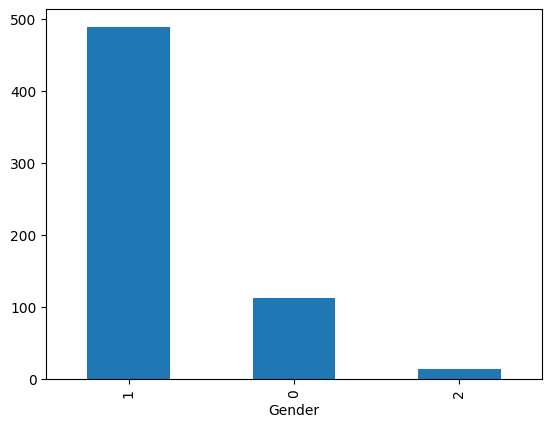

In [77]:
df_train['Gender'].value_counts().plot(kind='bar')
plt.show()

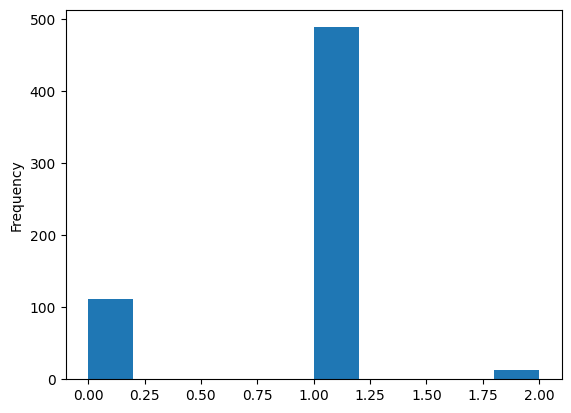

In [79]:
df_train['Gender'].plot.hist()
plt.show()

In [81]:
df_train['Married'].value_counts()

Married
2    398
0    213
1      3
Name: count, dtype: int64

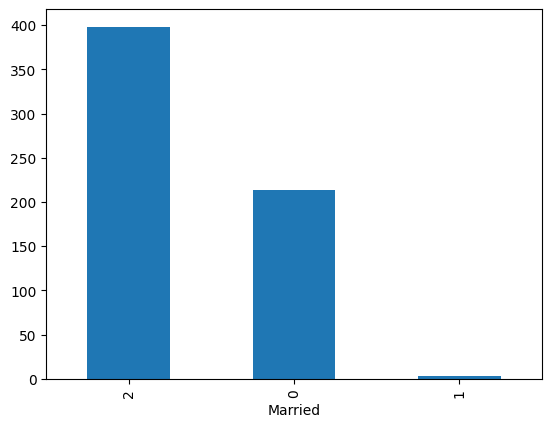

In [83]:
df_train['Married'].value_counts().plot.bar()
plt.show()

Dependents
0    345
1    102
2    101
3     51
4     15
Name: count, dtype: int64


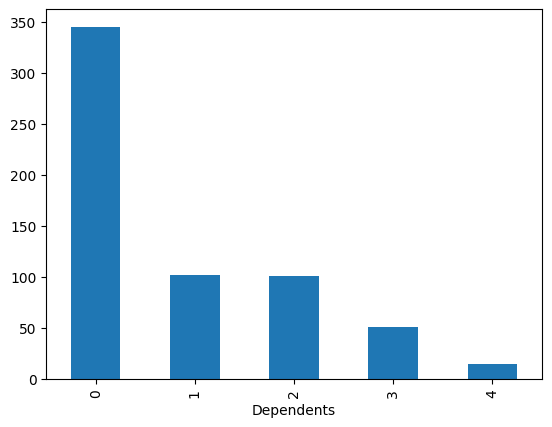

Education
0    480
1    134
Name: count, dtype: int64


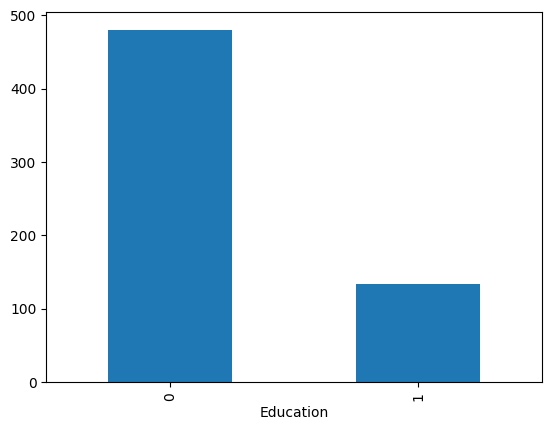

Self_Employed
0    500
2     82
1     32
Name: count, dtype: int64


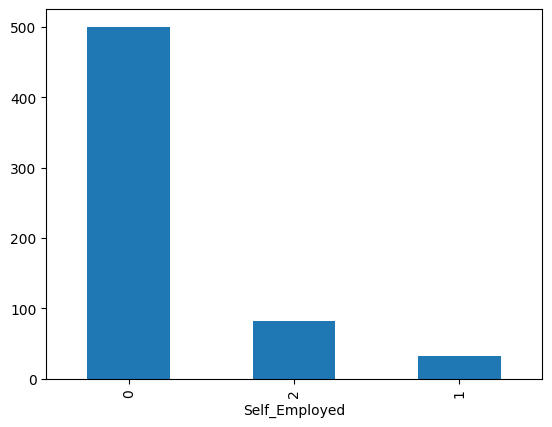

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64


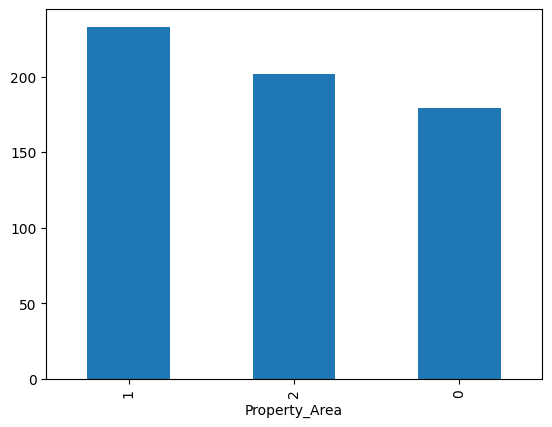

Loan_Status
1    422
0    192
Name: count, dtype: int64


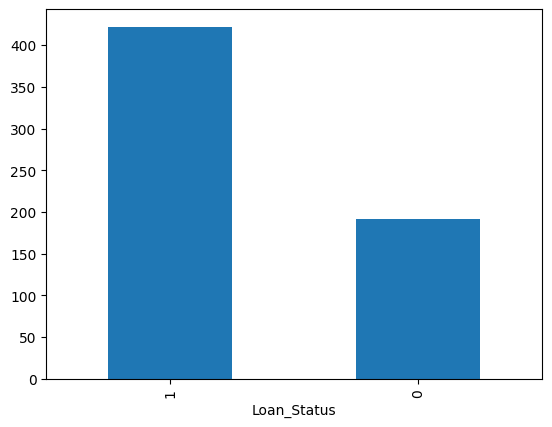

In [84]:
for x in ['Dependents' ,	'Education','Self_Employed','Property_Area','Loan_Status']:
    print(df_train[x].value_counts())
    df_train[x].value_counts().plot.bar()
    plt.show()

Dependents
0    345
1    102
2    101
3     51
4     15
Name: count, dtype: int64


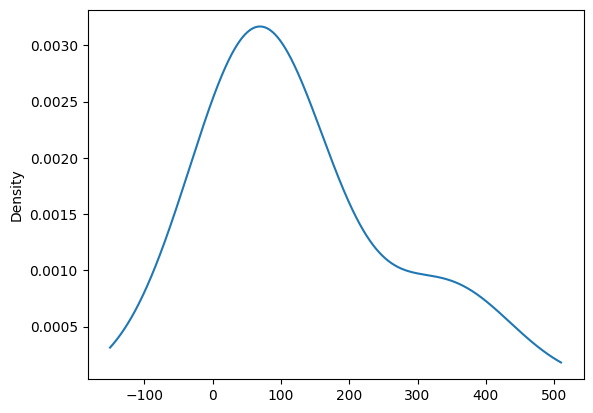

Education
0    480
1    134
Name: count, dtype: int64


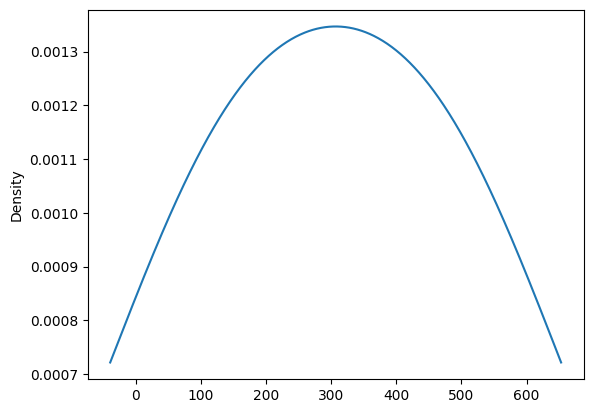

Self_Employed
0    500
2     82
1     32
Name: count, dtype: int64


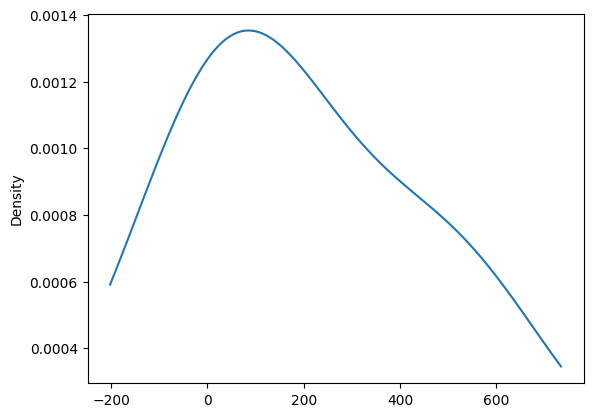

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64


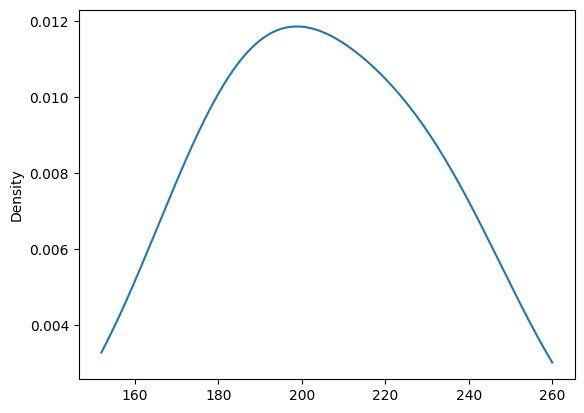

Loan_Status
1    422
0    192
Name: count, dtype: int64


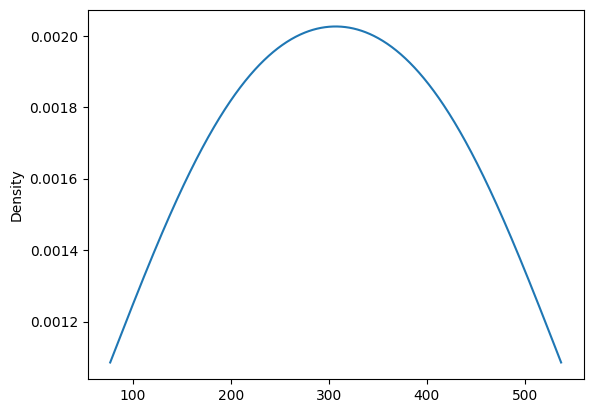

In [96]:
for x in ['Dependents' ,	'Education','Self_Employed','Property_Area','Loan_Status']:
    print(df_train[x].value_counts())
    df_train[x].value_counts().plot.kde()
    plt.show()
    

In [99]:
df_train['Dependents'].mean()

0.8420195439739414

In [101]:
df_train['Dependents'][84]

1

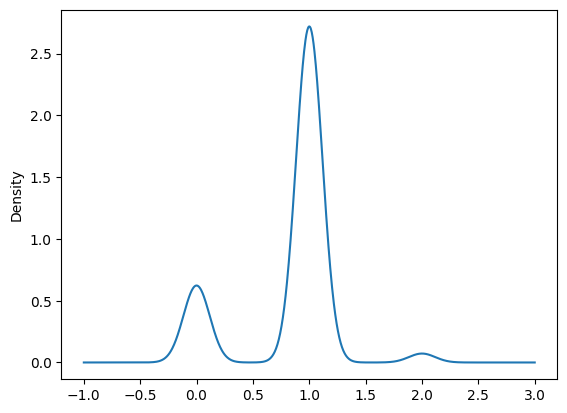

In [103]:
df_train['Gender'].plot.kde()
plt.show()

In [115]:
x =['Dependents' ,	'Education','Self_Employed','Property_Area','Loan_Status']
sns.plot(df_train[x])


AttributeError: module 'seaborn' has no attribute 'plot'